# Classic ML methods for HAR with Ambient Sensors

## 1. Load the data

In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn import  model_selection
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import matthews_corrcoef
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
import matplotlib.pyplot as plt

In [2]:
filename = 'csh110'
globalpath ='/home/alex/Datasets/HAR/'
filepath = globalpath + filename + '/' + filename + '.ann.features.csv' 
df = pd.read_csv(filepath)
df.head(5)

,lastSensorEventHours,lastSensorEventSeconds,lastSensorDayOfWeek,windowDuration,timeSinceLastSensorEvent,prevDominantSensor1,prevDominantSensor2,lastSensorID,lastSensorLocation,lastMotionLocation,...,sensorElTime-Chair,sensorElTime-DiningRoom,sensorElTime-Hall,sensorElTime-Ignore,sensorElTime-Kitchen,sensorElTime-LivingRoom,sensorElTime-Office,sensorElTime-OutsideDoor,sensorElTime-WorkArea,activity
0,3.0,11131.0,2.0,10942.0,590.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,590.491697,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
1,3.0,11132.0,2.0,10068.0,1.0,0.0,0.0,1.0,1.0,1.0,...,86400.0,86400.0,86400.0,591.597136,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
2,3.0,11141.0,2.0,9752.0,9.0,0.0,0.0,5.0,5.0,1.0,...,86400.0,86400.0,86400.0,0.000000,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
3,3.0,11588.0,2.0,9324.0,447.0,0.0,0.0,5.0,5.0,1.0,...,86400.0,86400.0,86400.0,0.000000,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep
4,3.0,11740.0,2.0,9151.0,152.0,0.0,0.0,5.0,5.0,1.0,...,86400.0,86400.0,86400.0,0.000000,86400.0,86400.0,86400.0,86400.0,86400.0,Sleep


In [3]:
print(df.shape)

(136716, 37)


## 2. Inspect Data

### 2.1 Data description

**lastSensorEventHours:** (integer)  Hour of the day, in local time (min= 0.0, max=23.0)  
**lastSensorEventSeconds (decimal):** Seconds since midnight, in local time (count = 407481 min=1.0 max=86395.0)  
**lastSensorDayOfWeek (symbolic-valued integer):**  Integer day of the week, in local time (count=407481, min=0.0 max=6.0)  
**windowDuration (decimal):**  Time duration of the 30 event sliding window in seconds. count=407481, min=7.0 max=39269.0)  
**timeSinceLastSensorEvent (decimal):**  Seconds since the last sensor event. count = 407481 min=0.0 max=32855.0)  
**prevDominantSensor1 (symbolic-valued integer):**  Dominant sensor ID from the previous window. (count = 407481 min=0.0 max=10.0)  
**prevDominantSensor2 (symbolic-valued integer):**  Dominant sensor ID from the second previous window. (count=407481 min=0.0 max=10.0)  
**lastSensorID (symbolic-valued integer):**  Last sensor ID in the window. (count=407481 min=0.0 max=10.0)  
**lastSensorLocation (symbolic-valued integer):**  Last sensor location ID in the window. (count=407481 min=0.0 max=10.0)   
**lastMotionLocation (symbolic-valued integer):**  Last motion sensor location ID in the window, can be -1 if none within the sliding window. (count =407481 min=-1.0 max=10.0)  
**sensorElTime-Chair (decimal):** The number of seconds since this sensor was last seen, up to a maximum of 86400. (count=407481 min=86400.0    max=86400.0)  
**sensorElTime-DiningRoom (decimal):** The number of seconds since this sensor was last seen, up to a maximum of 86400. (count=407481 min=0.0  max=86400.0)  
**sensorElTime-Hall (decimal):** The number of seconds since this sensor was last seen, up to a maximum of 86400. (count=407481 min=86400.0 max =86400.0)  
**sensorElTime-Ignore (decimal):** The number of seconds since this sensor was last seen, up to a maximum of 86400.  
**sensorElTime-Kitchen (decimal):** The number of seconds since this sensor was last seen, up to a maximum of 86400.  
**sensorElTime-LivingRoom (decimal):** The number of seconds since this sensor was last seen, up to a maximum of 86400.    
**sensorElTime-Office (decimal):** The number of seconds since this sensor was last seen, up to a maximum of 86400.  
**sensorElTime-OutsideDoor (decimal):**  The number of seconds since this sensor was last seen, up to a maximum of 86400.  
**sensorElTime-WorkArea (decimal):** The number of seconds since this sensor was last seen, up to a maximum of 86400.  
**activity (class label):**  The annotated activity that is currently being observed. 
    unique values:  \[ 'Bathe' 'Bed_Toilet_Transition' 'Cook' 'Cook_Breakfast' 'Cook_Dinner'
 'Cook_Lunch' 'Dress' 'Drink' 'Eat' 'Eat_Breakfast' 'Eat_Dinner'
 'Eat_Lunch' 'Enter_Home' 'Entertain_Guests' 'Groom' 'Leave_Home'
 'Morning_Meds' 'Other_Activity' 'Personal_Hygiene' 'Phone' 'Read' 'Relax'
 'Sleep' 'Sleep_Out_Of_Bed' 'Step_Out' 'Take_Medicine' 'Toilet'
 'Wash_Breakfast_Dishes' 'Wash_Dinner_Dishes' 'Wash_Dishes'
 'Wash_Lunch_Dishes' 'Watch_TV' 'Work' 'Work_At_Table'\]

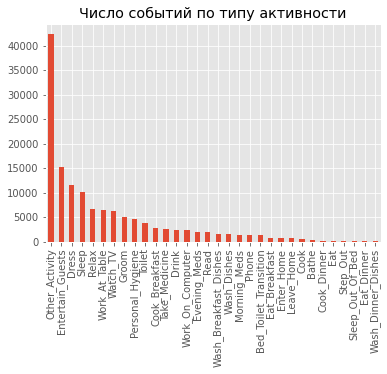

In [4]:
%matplotlib inline
plt.style.use('ggplot')
df['activity'].value_counts().plot(kind='bar',
                                   title='Число событий по типу активности')
file_name = 'Activity_Number_of_' + filename + '.png'
# plt.savefig(file_name,
#             dpi=100,
#             bbox_inches = "tight")
plt.show()

In [5]:
df['activity'].value_counts(normalize=True)

Other_Activity           0.309115
Entertain_Guests         0.111648
Dress                    0.083926
Sleep                    0.073510
Relax                    0.048341
Work_At_Table            0.046527
Watch_TV                 0.045679
Groom                    0.036002
Personal_Hygiene         0.033654
Toilet                   0.027063
Cook_Breakfast           0.020063
Take_Medicine            0.019061
Drink                    0.017942
Work_On_Computer         0.016545
Evening_Meds             0.014775
Read                     0.014585
Wash_Breakfast_Dishes    0.011959
Wash_Dishes              0.011498
Morning_Meds             0.010474
Phone                    0.009787
Bed_Toilet_Transition    0.009428
Eat_Breakfast            0.006027
Enter_Home               0.005603
Leave_Home               0.005588
Cook                     0.003606
Bathe                    0.001902
Cook_Dinner              0.001565
Eat                      0.001521
Step_Out                 0.000966
Sleep_Out_Of_B

In [6]:
len(df['activity'].value_counts(normalize=True))

32

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136716 entries, 0 to 136715
Data columns (total 37 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   lastSensorEventHours      136716 non-null  float64
 1   lastSensorEventSeconds    136716 non-null  float64
 2   lastSensorDayOfWeek       136716 non-null  float64
 3   windowDuration            136716 non-null  float64
 4   timeSinceLastSensorEvent  136716 non-null  float64
 5   prevDominantSensor1       136716 non-null  float64
 6   prevDominantSensor2       136716 non-null  float64
 7   lastSensorID              136716 non-null  float64
 8   lastSensorLocation        136716 non-null  float64
 9   lastMotionLocation        136716 non-null  float64
 10  complexity                136716 non-null  float64
 11  activityChange            136716 non-null  float64
 12  areaTransitions           136716 non-null  float64
 13  numDistinctSensors        136716 non-null  f

## Drop Rare Data

In [8]:
# get the count of each value
value_counts = df['activity'].value_counts()
# select the values where the count less than 2%
threshhold = int(2*len(df['activity'])/100)
# remove rows where counts less than threshhold
to_remove = value_counts[value_counts <= threshhold].index
# keep other rows
df = df[~df.activity.isin(to_remove)]
df['activity'].value_counts(normalize=False)

Other_Activity      42261
Entertain_Guests    15264
Dress               11474
Sleep               10050
Relax                6609
Work_At_Table        6361
Watch_TV             6245
Groom                4922
Personal_Hygiene     4601
Toilet               3700
Cook_Breakfast       2743
Name: activity, dtype: int64

## Train-Test Split Data

In [9]:
dataset = df.values
train_dataset, test_dataset = model_selection.train_test_split(dataset,
                                                               test_size=0.3,
                                                               shuffle=False)

print(train_dataset.shape)
print(test_dataset.shape)

(79961, 37)
(34269, 37)


## Scale Data

In [10]:
X_train = train_dataset[:, :-1]
Y_train = train_dataset[:, -1]
X_test = test_dataset[:, :-1]
Y_test = test_dataset[:, -1]
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(79961, 36) (79961,)
(34269, 36) (34269,)


In [11]:
scaler = preprocessing.MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
# convert to float32
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

## Create Models

### 1. kNN

In [12]:
# number of neighbors
n_neighbors = 5
# create and fit model
model = KNeighborsClassifier(n_neighbors=n_neighbors)
model.fit(X_train, Y_train)

KNeighborsClassifier()

In [13]:
# evaluate model
Y_pred_test = model.predict(X_test)
kNN_Acc = accuracy_score(Y_test, Y_pred_test)
print(f'Accuracy of test data: {kNN_Acc * 100.0:.1f}')

Accuracy of test data: 51.0


In [14]:
# print confusion matrix for test data
print(classification_report(Y_test, Y_pred_test))

                  precision    recall  f1-score   support

  Cook_Breakfast       0.72      0.61      0.66       783
           Dress       0.41      0.53      0.46      2989
Entertain_Guests       0.27      0.47      0.34      3266
           Groom       0.66      0.75      0.70      1888
  Other_Activity       0.64      0.56      0.60     13351
Personal_Hygiene       0.45      0.23      0.30      1777
           Relax       0.13      0.13      0.13      1570
           Sleep       0.62      0.59      0.61      2376
          Toilet       0.25      0.37      0.30      1115
        Watch_TV       0.57      0.42      0.48      2499
   Work_At_Table       0.73      0.56      0.63      2655

        accuracy                           0.51     34269
       macro avg       0.50      0.47      0.47     34269
    weighted avg       0.54      0.51      0.52     34269



In [15]:
kNN_MCC = matthews_corrcoef(Y_test, Y_pred_test)
print(f'MCC for kNN: {kNN_MCC:.2f}')

MCC for kNN: 0.40


### 2. Decision Tree

In [16]:
# create and fit model
model = DecisionTreeClassifier()
model.fit(X_train, Y_train)
# evaluate model
Y_pred_test = model.predict(X_test)
DesTree_Acc = accuracy_score(Y_test, Y_pred_test)
print(f'Accuracy of test data: {DesTree_Acc * 100.0:.1f}')

Accuracy of test data: 49.8


In [17]:
# print confusion matrix for test data
print(classification_report(Y_test, Y_pred_test))

                  precision    recall  f1-score   support

  Cook_Breakfast       0.33      0.03      0.06       783
           Dress       0.27      0.15      0.19      2989
Entertain_Guests       0.42      0.32      0.36      3266
           Groom       0.62      0.38      0.47      1888
  Other_Activity       0.53      0.68      0.60     13351
Personal_Hygiene       0.38      0.28      0.32      1777
           Relax       0.23      0.24      0.24      1570
           Sleep       0.52      0.66      0.58      2376
          Toilet       0.34      0.44      0.38      1115
        Watch_TV       0.66      0.45      0.54      2499
   Work_At_Table       0.61      0.62      0.61      2655

        accuracy                           0.50     34269
       macro avg       0.45      0.39      0.40     34269
    weighted avg       0.49      0.50      0.48     34269



In [18]:
DesTree_MCC = matthews_corrcoef(Y_test, Y_pred_test)
print(f'MCC for DesTree: {DesTree_MCC:.2f}')

MCC for DesTree: 0.35


### 3.Support Vector Machine

In [19]:
# create and fit model
model = SVC()
model.fit(X_train, Y_train)
# evaluate model
Y_pred_test = model.predict(X_test)
SVM_Acc = accuracy_score(Y_test, Y_pred_test)
print(f'Accuracy of test data: {SVM_Acc * 100.0:.1f}')

Accuracy of test data: 60.9


In [20]:
# print confusion matrix for test data
print(classification_report(Y_test, Y_pred_test))

                  precision    recall  f1-score   support

  Cook_Breakfast       0.93      0.77      0.84       783
           Dress       0.43      0.69      0.53      2989
Entertain_Guests       0.36      0.29      0.32      3266
           Groom       0.77      0.89      0.83      1888
  Other_Activity       0.66      0.68      0.67     13351
Personal_Hygiene       0.77      0.70      0.74      1777
           Relax       0.24      0.15      0.18      1570
           Sleep       0.69      0.64      0.66      2376
          Toilet       0.55      0.60      0.57      1115
        Watch_TV       0.64      0.48      0.54      2499
   Work_At_Table       0.68      0.62      0.65      2655

        accuracy                           0.61     34269
       macro avg       0.61      0.59      0.59     34269
    weighted avg       0.61      0.61      0.60     34269



In [21]:
SVM_MCC = matthews_corrcoef(Y_test, Y_pred_test)
print(f'MCC for SVM: {SVM_MCC:.2f}')

MCC for SVM: 0.51


### 4. Naive Bayes

In [22]:
# create and fit model
model = MultinomialNB()
model.fit(X_train, Y_train)
# evaluate model
Y_pred_test = model.predict(X_test)
NB_Acc = accuracy_score(Y_test, Y_pred_test)
print(f'Accuracy of test data: {NB_Acc * 100.0:.1f}')

Accuracy of test data: 43.9


In [23]:
# print confusion matrix for test data
print(classification_report(Y_test, Y_pred_test, zero_division=0))

                  precision    recall  f1-score   support

  Cook_Breakfast       1.00      0.03      0.05       783
           Dress       0.38      0.61      0.47      2989
Entertain_Guests       0.27      0.44      0.34      3266
           Groom       0.51      0.37      0.43      1888
  Other_Activity       0.43      0.59      0.50     13351
Personal_Hygiene       0.75      0.03      0.06      1777
           Relax       0.00      0.00      0.00      1570
           Sleep       0.74      0.63      0.68      2376
          Toilet       0.16      0.01      0.01      1115
        Watch_TV       0.21      0.00      0.01      2499
   Work_At_Table       0.67      0.59      0.63      2655

        accuracy                           0.44     34269
       macro avg       0.47      0.30      0.29     34269
    weighted avg       0.44      0.44      0.39     34269



In [24]:
NB_MCC = matthews_corrcoef(Y_test, Y_pred_test)
print(f'MCC for NB: {NB_MCC:.2f}')

MCC for NB: 0.26
